In [6]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------

# Importing Libraries

In [7]:
import numpy as np
import tensorflow as tf

# Loading Datasets

In [8]:
width = 224
height = 224
# height and width are 244 sice we will use monileNetV2 network
batch_size =  32
data_dir = r'C:\Users\KodavatiGeetanjali\Desktop\ML\Face mask\data'

In [9]:
trainig = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='training',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 5288 files for training.


In [10]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=(height,width),
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 2265 files for validation.


In [11]:
classes = trainig.class_names
classes

['with_mask', 'without_mask']

In [12]:
trainig

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Visualizing Image in a Dataset

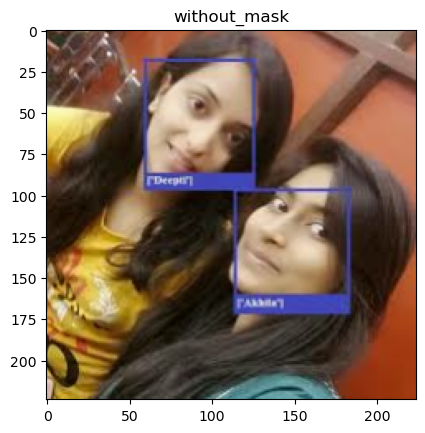

In [13]:
import matplotlib.pyplot as plt
for images, labels in trainig.take(1):
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.title(classes[labels[1]])

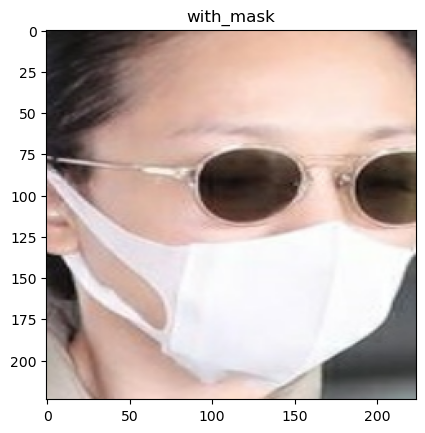

In [14]:
import matplotlib.pyplot as plt
for images, labels in trainig.take(2):
    plt.imshow(images[2].numpy().astype('uint8'))
    plt.title(classes[labels[2]])

# Loading the MobileNetv2 model

In [15]:
from tensorflow.keras.applications import MobileNetV2

In [16]:
model = MobileNetV2(weights='imagenet')

# Compiling the Model

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

# Training The Model

In [19]:
face_mask_detection = model.fit(trainig, validation_data = validation, epochs=3)

Epoch 1/3


C:\Users\KodavatiGeetanjali\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


166/166 ━━━━━━━━━━━━━━━━━━━━ 2248s 13s/step - accuracy: 0.9169 - loss: 0.5507 - val_accuracy: 0.7210 - val_loss: 4.2589
Epoch 2/3
166/166 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - accuracy: 0.9905 - loss: 0.0257 - val_accuracy: 0.9629 - val_loss: 0.3379
Epoch 3/3
166/166 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9903 - loss: 0.0273 - val_accuracy: 0.9501 - val_loss: 0.4744


# Predictiong the Model

In [36]:
# load the image 
img = tf.keras.preprocessing.image.load_img(r"C:\Users\KodavatiGeetanjali\Desktop\ML\Face mask\data\without_mask\without_mask_3.jpg",
                                            target_size=(height, width))
#covert to array
image_array = tf.keras.preprocessing.image.img_to_array(img)
#expand dimensions to fit in the model
image_array = tf.expand_dims(image_array, 0)
#check the shape of the image
image_array.shape

TensorShape([1, 224, 224, 3])

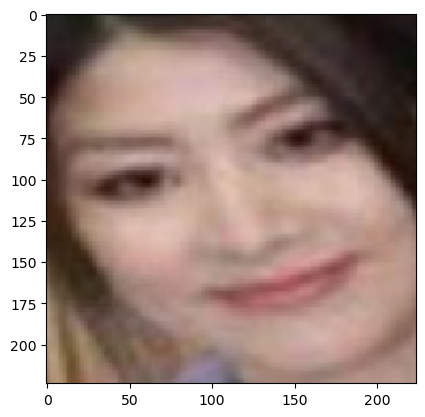

In [37]:
plt.imshow(img)
plt.show()

In [38]:
prediction = model.predict(image_array)
#use softmax to get the result
score = tf.nn.softmax(prediction[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [39]:
print(score)

tf.Tensor(
[0.00099828 0.00271362 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828 0.00099828
 0.00099828 0.00099828 0.00099828 0.00099828 0.0009

In [40]:
prediction_label = np.argmax(prediction)

print(prediction_label)

if prediction_label == 0:
    print ("The preson is wearing mask.")
else:
    print ("The person is not wearing mask.")

1
The person is not wearing mask.
